# Trabalho 1 - Inventário de emissões com Python
Desenvolvedores: José Henrique Hess e Kezia Bernarda de Oliveira

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale
from matplotlib.ticker import FuncFormatter

## Ler planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento.
Foi utilizado o capítulo 12.13 da AP42, pois a fundição de aço é a mais representativa da empresa WEG.
Link: https://www.epa.gov/sites/default/files/2020-11/documents/c12s13.pdf

In [2]:
# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = os.path.join(cwd, 'tabelas', 'FE')

# Indicando nome do arquivo
chapterNumer = 12
subChapter = 13
file = f'chp_{chapterNumer}_{subChapter}.csv'
print(file)

# Diretório do arquivo completo
full_path = os.path.join(path, file)
print(full_path)

# Abrindo o arquivo utilizando o pandas
fe = pd.read_csv(full_path, encoding='utf-8')
print(fe)

chp_12_13.csv
C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\FE\chp_12_13.csv
                 Processo  Particula Filtravel  NOx  PM10
0                   Fusão                  6.5  0.1   NaN
1  Manuseio Areia (areia)                  NaN  NaN  0.27
2    Manuseio Areia (aço)                  NaN  NaN  3.00
3          Fornos (areia)                  NaN  NaN  1.11
4            Fornos (aço)                  NaN  NaN  0.45
5            Derramamento                  NaN  NaN  1.40
6                 Limpeza                  NaN  NaN  0.85
7              Tratamento                  NaN  NaN  0.18
8            Resfriamento                  NaN  NaN  0.70


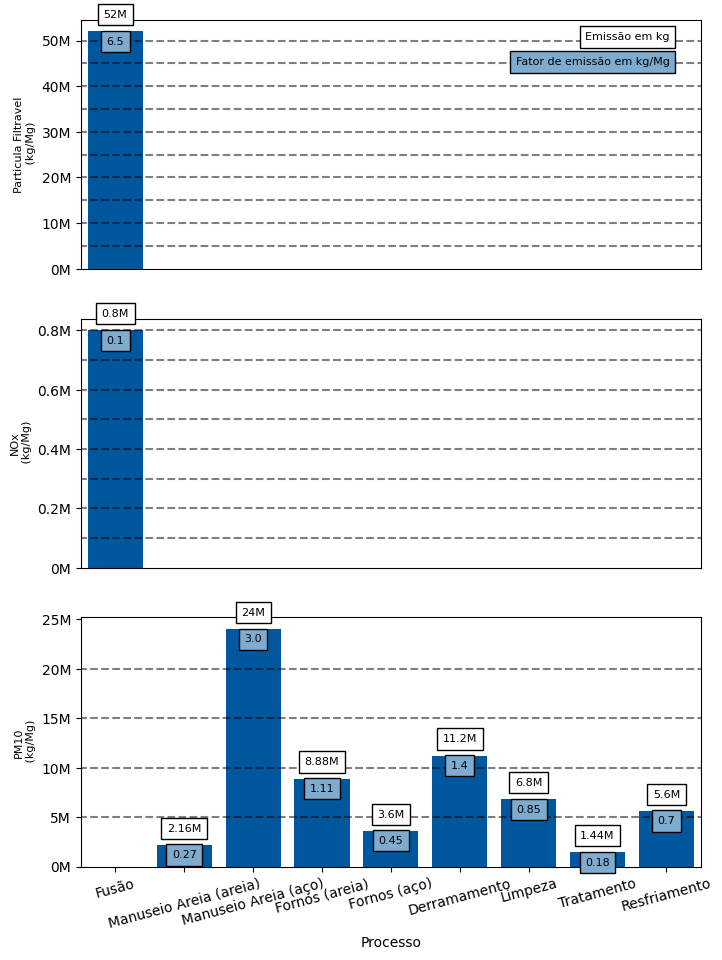

In [3]:
# Plotando os fatores de emissão

# Função para formatar os rótulos em milhões
def milhao(x, pos):
    if x % 1e6 == 0:
        return '%1.0fM' % (x * 1e-6)
    elif x % 1e5 == 0:
        return '%1.1fM' % (x * 1e-6)
    else:
        return '%1.2fM' % (x * 1e-6)

atv = 8000000 # Considerando a taxa de atividade igual a 40% do total de motores produzidos pela WEG
# print(atv)

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True,figsize=(8,11))

#Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    barras = ax[ii-1].bar(fe['Processo'], atv * fe.iloc[:, ii], color='#00579D')
    
    # Anotando o valor de cada barra e o fator de emissão de cada barra
    for barra in barras:
        altura = barra.get_height()
        if np.isfinite(altura):  # Verificando se a altura não é nan
            i = round((barra.get_x())-0.6)+1
            # Adicionando os valores totais de emissão e de fator de emissão
            ax[ii-1].text(barra.get_x() + barra.get_width() / 2, altura + 0.05 * atv*fe.iloc[:,ii].max(), milhao(altura, None),
                          ha='center', va='bottom', fontsize=8,
                          bbox=dict(facecolor='white', alpha=1, edgecolor='black'))
            ax[ii-1].text(barra.get_x() + barra.get_width() / 2, altura - 0.02 * atv*fe.iloc[:,ii].max(), fe.iloc[i, ii],
                          ha='center', va='top', fontsize=8,
                          bbox=dict(facecolor='#7FABCE', alpha=1, edgecolor='black'))

    # Explicação dos textos
    if ii == 1:
        ax[ii-1].text(0.95, 0.95, 'Emissão em kg', transform=ax[ii-1].transAxes, fontsize=8,
                      verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=1))
        ax[ii-1].text(0.95, 0.85, 'Fator de emissão em kg/Mg', transform=ax[ii-1].transAxes, fontsize=8,
                      verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='#7FABCE', alpha=1))

    # If Else para deixar o eixo x apenas no último gráfico
    if ax[2] == ax[ii-1]:
        ax[ii-1].set_xlabel('Processo')
        ax[ii-1].set_xticks(range(len(fe['Processo'])))
        ax[ii-1].set_xticklabels(fe['Processo'], rotation=15)
    else: 
        ax[ii-1].xaxis.set_visible(False)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)',fontsize=8)

    # Configura o formatter para milhões
    formatter = FuncFormatter(milhao)
    ax[ii-1].yaxis.set_major_formatter(formatter)

    # Limitando o tamanho do eixo x
    ax[ii-1].set_xlim(-0.5,8.5)

    # Estabelecendo linhas pontilhadas no gráfico
    for i in range(1,int(atv*fe.iloc[:,ii].max())+1):
        if i%100000 == 0:
            if int(atv*fe.iloc[:,ii].max()) < 1000000:
                ax[ii-1].hlines(y=i,xmin=-1,xmax=9, alpha=0.5,linestyle='dashed', colors = 'black')
            else: 
                if i%5000000 == 0:
                    ax[ii-1].hlines(y=i,xmin=-1,xmax=9, alpha=0.5,linestyle='dashed', colors = 'black')

# Salva a figura na pasta figures - criar a pasta antes
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

In [116]:
# Criando vetor de datas
import pandas as pd

atv = atv/100

# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Criando valor da semana 
sem = np.full(len(df),1)
for i in range(167,8760,168):
    sem[i:] += 1
df['Semana'] = sem

# Mostrar o DataFrame resultante
print(df)

                    Data  Mes  Semana
0    2023-01-01 00:00:00    1       1
1    2023-01-01 01:00:00    1       1
2    2023-01-01 02:00:00    1       1
3    2023-01-01 03:00:00    1       1
4    2023-01-01 04:00:00    1       1
...                  ...  ...     ...
8755 2023-12-31 19:00:00   12      53
8756 2023-12-31 20:00:00   12      53
8757 2023-12-31 21:00:00   12      53
8758 2023-12-31 22:00:00   12      53
8759 2023-12-31 23:00:00   12      53

[8760 rows x 3 columns]


In [117]:
# Criando sazonalidade de acordo com as ações

df_acoes = pd.read_csv(r'C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\acoes_WEG.csv', encoding='utf-8')

# Filtrando a última e primeira coluna
df_acoes = df_acoes.iloc[:, [0, 3]]

# Criando um dataframe com todas as datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df_datas = pd.DataFrame(datas, columns=['Data'])

# Converter a coluna de datas do df_acoes para datetime
df_acoes['Data'] = pd.to_datetime(df_acoes['Data'], format='%m/%d/%Y')

# Combinando os DataFrames
df_acoes = df_datas.merge(df_acoes, on='Data', how='left')

# Interpolando linearmente os valores NaN e definindo 0 para primeiro de janeiro
df_acoes['Porcentagem'] = df_acoes['Porcentagem'].interpolate(method='linear')
df_acoes['Porcentagem'] = df_acoes['Porcentagem'].fillna(0)

print(df_acoes)

# Definindo a taxa de atividade média horária para chegar em 8 milhoes de toneladas de aço no ano.

# Somando as porcentagens para definir em que ponto a produção ficou na média.
prctMed = ((df_acoes['Porcentagem'] + 100).mean())/100

# Definindo a atividade média horária
atvMedH = atv/(365*24*prctMed)

          Data  Porcentagem
0   2023-01-01         0.00
1   2023-01-02        -1.04
2   2023-01-03        -3.51
3   2023-01-04        -2.86
4   2023-01-05        -2.65
..         ...          ...
360 2023-12-27        -4.31
361 2023-12-28        -4.13
362 2023-12-29        -4.13
363 2023-12-30        -4.13
364 2023-12-31        -4.13

[365 rows x 2 columns]


                    Data  Mes  Semana  atividade  sazonalidade  \
0    2023-01-01 00:00:00    1       1   9.484932        1.0000   
1    2023-01-01 01:00:00    1       1   9.573831        1.0000   
2    2023-01-01 02:00:00    1       1   9.198618        1.0000   
3    2023-01-01 03:00:00    1       1   9.468616        1.0000   
4    2023-01-01 04:00:00    1       1   9.281201        1.0000   
...                  ...  ...     ...        ...           ...   
8755 2023-12-31 19:00:00   12      53   9.272954        0.9587   
8756 2023-12-31 20:00:00   12      53   9.397120        0.9587   
8757 2023-12-31 21:00:00   12      53   9.357868        0.9587   
8758 2023-12-31 22:00:00   12      53   9.459493        0.9587   
8759 2023-12-31 23:00:00   12      53   9.348544        0.9587   

      Atividade Horária  
0              9.502152  
1              9.450426  
2              9.616690  
3              9.570737  
4              9.351041  
...                 ...  
8755           9.124843  

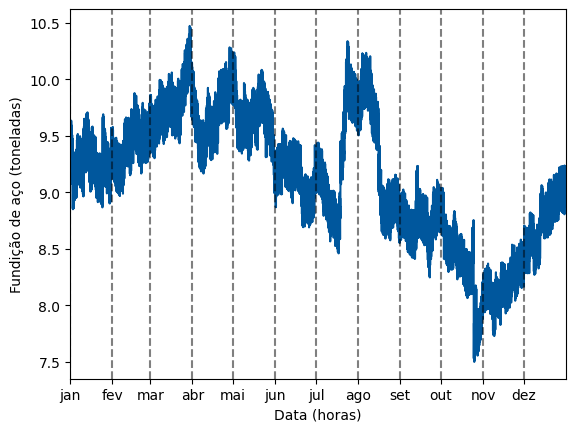

In [150]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Definindo a atividade máxima e mínima horária
atvMaxH = 1.025*atvMedH
atvMinH = 0.975*atvMedH

# Criando atividade aleatória
atvArray = (atvMaxH - atvMinH)*np.random.rand(n) + atvMinH
df['atividade'] = atvArray

# Criando componente sazonal
#sazonalidade = atvMinH*np.cos((2*np.pi)*(df['Semana']-1)/26)/2
#df['sazonalidade'] = sazonalidade
#print(df)

# Criando componente sazonal
sazonalidade = df_acoes['Porcentagem']/100 + 1
sazonalidade = np.repeat(sazonalidade.values, 24)
df['sazonalidade'] = sazonalidade
print(df)

# Criando atividade real
atvHor = atvArray*sazonalidade
df['Atividade Horária'] = atvHor

# Configurando o locale para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()

ax.plot(df['Data'],df['Atividade Horária'], color = '#00579D', alpha = 1, label = 'Produção horária')
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

# Adicionando linha para cada mês
for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
    ax.axvline(x=date, color='black', linestyle='--', alpha=0.5)

# Configurando o formato do eixo x para mostrar os meses abreviados
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

# Definindo o label de cada eixo
ax.set_ylabel('Fundição de aço (toneladas)')
ax.set_xlabel('Data (horas)')

df.to_csv(r"C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\ativWEG.csv")

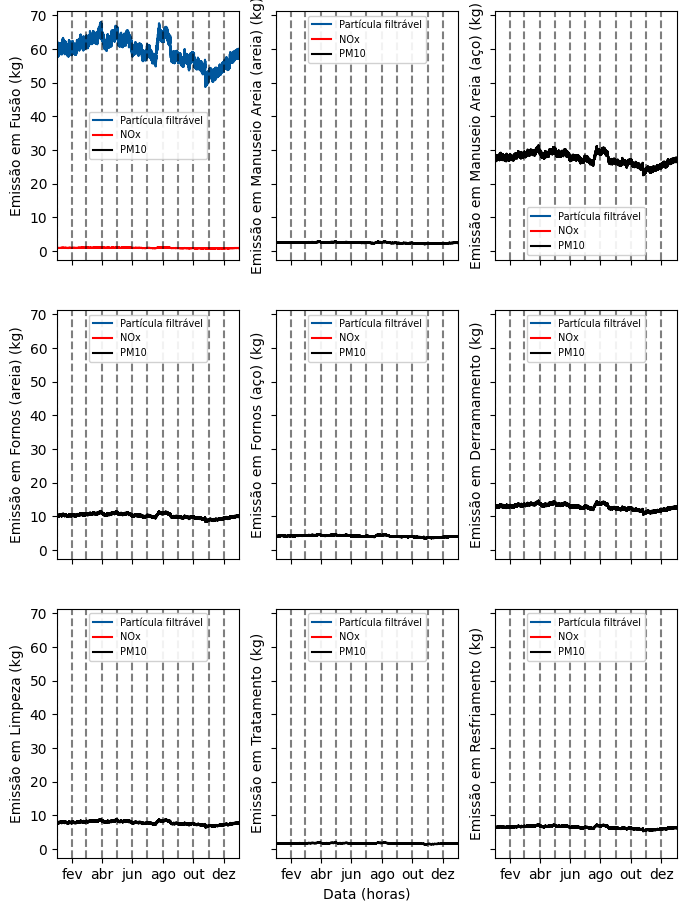

In [149]:
# Criando a figura de emissão de cada processo 

# Subplots com número de linhas e colunas o suficiente para todos os processos
# Sharex significa compartilhar eixo x e sharey significa compartilhar o eixo y
fig,ax = plt.subplots(3,3,sharex=True,sharey=True, figsize=(8,11))
colors = ['#00579D','red','black']
labels = ['Partícula filtrável', 'NOx', 'PM10']

#Loop para preencher o subplot com os gráficos
for i in range(3):
    for j in range(3):
        for k in range(1,4):
            if i==0:
                a=j
            elif i==1:
                a=j+3
            else:   
                a=j+6
            FE = fe.iloc[a, k]
            ax[i,j].plot(df['Data'],df['Atividade Horária']*FE, color = colors[k-1], alpha=1, label=labels[k-1])
        ax[i,j].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))
    
        # Adicionando linha para cada mês
        for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
            ax[i,j].axvline(x=date, color='black', linestyle='--', alpha=0.5)
    
        # Configurando o formato do eixo x para mostrar os meses abreviados
        ax[i,j].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(2, 4, 6, 8, 10, 12)))  # Coloca um marcador em cada mês
        ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

        # Criando legenda de acordo com o processo
        leg = ax[i, j].legend(fontsize=7, framealpha=0.9)

        # Definindo o label de cada eixo
        ax[i, j].set_ylabel('Emissão em ' + fe['Processo'][a] + ' (kg)')
        if i == 2 and j == 1:
            ax[i,j].set_xlabel('Data (horas)')

# Salva a figura na pasta figures
fig.savefig(cwd+'\\figures\\emissaoProcessos.png')

6.5
0.1
7.960000000000001


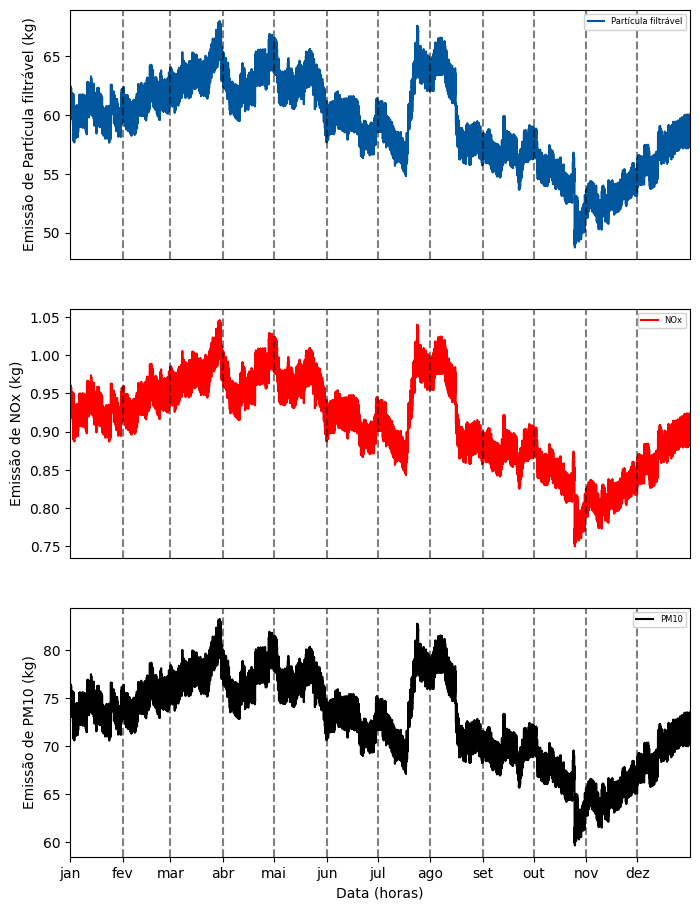

In [133]:
# Criando a figura de emissão para cada poluente

# Subplots com número de linhas e colunas o suficiente para todos os poluente
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True, figsize=(8,11))

#Loop para preencher o subplot com os gráficos
for ii in range(1,len(fe.columns)):
    # Soma dos fatores de emissão de cada poluente
    SomaFE = (fe.iloc[:,ii]).sum()
    print(SomaFE)

    # Plotando os valores no gráfico
    ax[ii-1].plot(df['Data'],df['Atividade Horária']*SomaFE, color = colors[ii-1], alpha=1, label=labels[ii-1])
    ax[ii-1].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

    # Adicionando linha para cada mês
    for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
        ax[ii-1].axvline(x=date, color='black', linestyle='--', alpha=0.5)

    # Configurando o formato do eixo x para mostrar os meses abreviados
    ax[ii-1].xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
    ax[ii-1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

    # Definindo o label de cada eixo
    if ax[2] == ax[ii-1]:
        ax[ii-1].set_xlabel('Data (horas)')
    else: 
        ax[ii-1].xaxis.set_visible(False)
    ax[ii-1].set_ylabel('Emissão de ' + labels[ii-1] + ' (kg)')
    
    # Criando legenda de acordo com o processo
    leg = ax[ii-1].legend(loc='best', fontsize=6, title_fontsize=7, framealpha=0.9)
     
# Salva a figura na pasta figures
fig.savefig(cwd+'\\figures\\emissaoPoluentes.png')

In [171]:
# Qual a soma das emissões considerando todos os processos? 
# Qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

# Cálcula emissões para cada poluente
for ii in range(1,len(fe.columns)):
    # Somando os fatores de emissão de cada processo para um poluente
    SomaFE = (fe.iloc[:,ii]).sum()

    # Encontrando o menor, maior e médio valor de emissão, fazendo conversão de kg/h para g/s com a multiplicação de 1000/3600
    emissSoma = round(df['Atividade Horária'].sum() * SomaFE, 2)
    emissMenor = round(df['Atividade Horária'].min() * SomaFE * 1000/3600,2)
    emissMaior = round(df['Atividade Horária'].max() * SomaFE * 1000/3600,2)
    emissMedia = round(df['Atividade Horária'].mean() * SomaFE * 1000/3600,2)

    print('A soma das emissões de ' + labels[ii-1] + ' foi de ' + str(emissSoma) + ' kg')
    print('A emissão mínima de ' + labels[ii-1] + ' foi de ' + str(emissMenor) + ' g/s')
    print('A emissão média de ' + labels[ii-1] + ' foi de ' + str(emissMedia) + ' g/s')
    print('A emissão máxima de ' + labels[ii-1] + ' foi de ' + str(emissMaior) + ' g/s')
    print('')

A soma das emissões de Partícula filtrável foi de 520078.16 kg
A emissão mínima de Partícula filtrável foi de 13.54 g/s
A emissão média de Partícula filtrável foi de 16.49 g/s
A emissão máxima de Partícula filtrável foi de 18.91 g/s

A soma das emissões de NOx foi de 8001.2 kg
A emissão mínima de NOx foi de 0.21 g/s
A emissão média de NOx foi de 0.25 g/s
A emissão máxima de NOx foi de 0.29 g/s

A soma das emissões de PM10 foi de 636895.71 kg
A emissão mínima de PM10 foi de 16.58 g/s
A emissão média de PM10 foi de 20.2 g/s
A emissão máxima de PM10 foi de 23.16 g/s

